In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd

import fastai
from fastai.tabular import *

import os

In [3]:
PATH = os.getcwd()
PATH

'/home/ubuntu/kaggles/houses'

# Load data
Loaded train csv (split to train and validation) and test csv to Pandas df

In [4]:
def fillna_with_mean(df, fields=[]):
    for f in fields:
        df[f] = df[f].fillna(df[f].mean())

In [5]:
cat_names = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BsmtCond',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
            'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFinSF1', 'BsmtFinSF2']
cont_names = ['LotFrontage', 'LotArea', 'MasVnrArea',    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
              'GrLivArea',  'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MiscVal',
#               'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea',
             ]
all_columns = cat_names + cont_names
dep_var = 'SalePrice'

In [6]:
# cat_names = ['YrSold', 'YearBuilt']
# cont_names = ['LotArea']
# dep_var = 'SalePrice'
# all_columns = cat_names + cont_names

In [7]:
dtypes_cat = {cat:'category' for cat in cat_names}
dtypes_cont = {cont:np.float32 for cont in cont_names}
dtypes = {**dtypes_cat, **dtypes_cont, dep_var:np.float32}
dtypes

{'MSSubClass': 'category',
 'MSZoning': 'category',
 'Street': 'category',
 'LotShape': 'category',
 'LandContour': 'category',
 'Utilities': 'category',
 'LotConfig': 'category',
 'LandSlope': 'category',
 'Neighborhood': 'category',
 'BsmtCond': 'category',
 'Condition1': 'category',
 'Condition2': 'category',
 'BldgType': 'category',
 'HouseStyle': 'category',
 'OverallQual': 'category',
 'OverallCond': 'category',
 'YearBuilt': 'category',
 'YearRemodAdd': 'category',
 'RoofStyle': 'category',
 'RoofMatl': 'category',
 'Exterior1st': 'category',
 'Exterior2nd': 'category',
 'MasVnrType': 'category',
 'ExterQual': 'category',
 'ExterCond': 'category',
 'Foundation': 'category',
 'BsmtQual': 'category',
 'BsmtExposure': 'category',
 'BsmtFinType1': 'category',
 'BsmtFinType2': 'category',
 'Heating': 'category',
 'HeatingQC': 'category',
 'CentralAir': 'category',
 'Electrical': 'category',
 'BsmtFullBath': 'category',
 'BsmtHalfBath': 'category',
 'FullBath': 'category',
 'HalfBath'

In [8]:
train_csv_df = pd.read_csv(f'{PATH}/data/train.csv', dtype=dtypes, na_values=['NA'])
train_csv_df = train_csv_df[all_columns+[dep_var]]
# train_csv_df['BsmtUnfSF'] = train_csv_df['BsmtUnfSF'].fillna(train_csv_df['BsmtUnfSF'].mean())
# train_csv_df['TotalBsmtSF'] = train_csv_df['TotalBsmtSF'].fillna(train_csv_df['TotalBsmtSF'].mean())
train_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
Street           1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
BsmtCond         1423 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null category
YearRemodAdd     1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType   

In [9]:
# train_csv_df[train_csv_df['MasVnrArea'] == 0]['MasVnrArea']

In [10]:
test_csv_df = pd.read_csv(f'{PATH}/data/test.csv', index_col='Id', dtype=dtypes)
test_csv_df = test_csv_df[all_columns]
# test_csv_df['BsmtUnfSF'] = test_csv_df['BsmtUnfSF'].fillna(test_csv_df['BsmtUnfSF'].mean())
# test_csv_df['TotalBsmtSF'] = test_csv_df['TotalBsmtSF'].fillna(test_csv_df['TotalBsmtSF'].mean())
test_csv_df.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,...,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,TA,...,11622.0,0.0,896.0,0.0,0.0,896.0,140.0,0.0,120.0,0.0
1462,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,TA,...,14267.0,108.0,1329.0,0.0,0.0,1329.0,393.0,36.0,0.0,12500.0
1463,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,TA,...,13830.0,0.0,928.0,701.0,0.0,1629.0,212.0,34.0,0.0,0.0
1464,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,TA,...,9978.0,20.0,926.0,678.0,0.0,1604.0,360.0,36.0,0.0,0.0
1465,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,TA,...,5005.0,0.0,1280.0,0.0,0.0,1280.0,0.0,82.0,144.0,0.0


In [11]:
cont_columns_with_nans = ['BsmtUnfSF', 'TotalBsmtSF']

In [12]:
cat_sz = [(c, len(train_csv_df[c].cat.categories)+1) for c in cat_names]
cat_sz

[('MSSubClass', 16),
 ('MSZoning', 6),
 ('Street', 3),
 ('LotShape', 5),
 ('LandContour', 5),
 ('Utilities', 3),
 ('LotConfig', 6),
 ('LandSlope', 4),
 ('Neighborhood', 26),
 ('BsmtCond', 5),
 ('Condition1', 10),
 ('Condition2', 9),
 ('BldgType', 6),
 ('HouseStyle', 9),
 ('OverallQual', 11),
 ('OverallCond', 10),
 ('YearBuilt', 113),
 ('YearRemodAdd', 62),
 ('RoofStyle', 7),
 ('RoofMatl', 9),
 ('Exterior1st', 16),
 ('Exterior2nd', 17),
 ('MasVnrType', 5),
 ('ExterQual', 5),
 ('ExterCond', 6),
 ('Foundation', 7),
 ('BsmtQual', 5),
 ('BsmtExposure', 5),
 ('BsmtFinType1', 7),
 ('BsmtFinType2', 7),
 ('Heating', 7),
 ('HeatingQC', 6),
 ('CentralAir', 3),
 ('Electrical', 6),
 ('BsmtFullBath', 5),
 ('BsmtHalfBath', 4),
 ('FullBath', 5),
 ('HalfBath', 4),
 ('BedroomAbvGr', 9),
 ('KitchenAbvGr', 5),
 ('KitchenQual', 5),
 ('TotRmsAbvGrd', 13),
 ('Functional', 8),
 ('Fireplaces', 5),
 ('FireplaceQu', 6),
 ('GarageType', 7),
 ('GarageYrBlt', 98),
 ('GarageFinish', 4),
 ('GarageCars', 6),
 ('Garage

In [13]:
emb_szs = {c: min(50, (c+1)//2) for _,c in cat_sz}
emb_szs

{16: 8,
 6: 3,
 3: 2,
 5: 3,
 4: 2,
 26: 13,
 10: 5,
 9: 5,
 11: 6,
 113: 50,
 62: 31,
 7: 4,
 17: 9,
 13: 7,
 8: 4,
 98: 49,
 121: 50,
 21: 11,
 638: 50,
 145: 50}

# Preprocessing
Data analysis and fields 

In [14]:
procs = [FillMissing, Categorify, Normalize]

In [15]:
test_data = TabularList.from_df(test_csv_df, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs, )

In [16]:
data = (
    TabularList.from_df(train_csv_df, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         no_split()
        .random_split_by_pct(valid_pct=0.2, seed=1337)
        .label_from_df(cols=dep_var, label_cls=FloatList)
        .add_test(test_data)
        .databunch(bs=128, num_workers=8 )
)

In [17]:
data.show_batch(rows=10)

MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,BsmtFinSF1,BsmtFinSF2,LotFrontage_na,MasVnrArea_na,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal,target
20,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,TA,Norm,Norm,1Fam,1Story,5,7,1958,1985,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,No,BLQ,LwQ,GasA,Fa,Y,SBrkr,0,1,1,0,2,1,TA,5,Typ,0,#na#,Attchd,1958,Fin,1,TA,TA,Y,0,0,0,6,2007,WD,Normal,111,279,False,False,-0.0202,-0.3149,-0.5720,-0.6374,-0.8118,-0.1197,-1.1431,-0.6699,3.6051,-0.2771,0.7894,120000.0
50,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,TA,Norm,Norm,1Fam,1.5Fin,5,7,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,PConc,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0,0,1,1,3,1,TA,8,Typ,0,#na#,Attchd,1955,Unf,1,TA,TA,Y,0,0,0,4,2008,WD,Normal,0,0,False,False,-0.5018,0.6471,-0.5720,-0.7382,0.3726,-0.1197,-0.2506,0.2137,-0.7013,4.4503,-0.0860,135500.0
20,RL,Pave,Reg,HLS,AllPub,Inside,Gtl,Edwards,TA,Norm,Norm,1Fam,1Story,4,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,No,Rec,Unf,GasA,TA,Y,FuseF,1,0,1,0,3,1,TA,6,Typ,0,#na#,Attchd,1965,Fin,1,TA,TA,P,0,0,0,5,2007,WD,Normal,520,0,False,False,0.1112,0.0498,-0.3074,-0.5165,-0.8118,-0.1197,-1.0540,0.2056,-0.7013,-0.2771,-0.0860,94750.0
90,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Gd,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,Gd,GLQ,Unf,GasA,TA,Y,SBrkr,3,0,3,0,3,1,TA,5,Typ,0,#na#,#na#,#na#,#na#,0,#na#,#na#,Y,0,0,0,3,2009,WD,Alloca,1200,0,False,False,-0.4580,0.0368,-0.5720,0.0881,-0.8118,-0.1197,-0.6087,0.2056,-0.7013,-0.2771,-0.0860,179000.0
20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,TA,Norm,Norm,1Fam,1Story,6,5,1994,1998,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,3,1,Gd,7,Typ,1,Fa,Attchd,1994,RFn,2,TA,TA,Y,0,0,0,10,2008,WD,Normal,1138,0,False,False,-0.2391,-0.2513,0.8499,1.2948,-0.8118,-0.1197,0.2801,1.0486,-0.0667,-0.2771,-0.0860,193500.0
20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007,RFn,3,TA,TA,Y,0,0,0,9,2009,WD,Normal,1288,0,False,False,0.3739,0.0192,1.2797,1.3930,-0.8118,-0.1197,0.3525,0.9189,-0.0364,-0.2771,-0.0860,297000.0
160,FV,Pave,Reg,Lvl,AllPub,FR2,Gtl,Somerst,TA,Norm,Norm,Twnhs,2Story,7,5,1999,1999,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,No,ALQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,0,#na#,Detchd,1999,Unf,2,TA,TA,Y,0,0,0,5,2010,WD,Normal,604,0,False,False,-2.0342,-0.8495,-0.5720,-1.1816,0.8250,-0.1197,-0.2079,-0.7672,-0.0364,-0.2771,-0.0860,155000.0
60,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,TA,Norm,Norm,1Fam,2Story,7,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,Gd,7,Typ,0,#na#,Attchd,2009,Unf,2,TA,TA,Y,0,0,0,6,2010,Con,Normal,24,0,False,False,0.0674,-0.1959,-0.5720,-1.0103,0.9682,-0.1197,0.0352,0.6028,-0.0213,-0.2771,-0.0860,215200.0
60,RL,Pave,IR2,Lvl,AllPub,FR2,Gtl,NoRidge,TA,Norm,Norm,1Fam,2Story,7,6,1994,1994,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,1994,Fin,2,TA,TA,Y,0,0,0,1,2009,WD,Normal,595,0,True,False,-0.0202,2.1005,-0.5720,-0.4687,1.1683,-0.1197,0.5974,0.5947,0.7795,-0.2771,-0.0860,248000.0
50,RL,Pave,IR1,Low,AllPub,Inside,Mod,Sawy

In [18]:
learner = tabular_learner(data, layers=[100], emb_drop=0.2, ps = 0.5, emb_szs=emb_szs,  
                          metrics=[root_mean_squared_error])
# learner.summary()

In [19]:
# lr = 1
# learner.lr_find()
# learner.recorder.plot()

In [20]:
learner.fit(epochs=170, lr=0.1)

epoch,train_loss,valid_loss,root_mean_squared_error
1,39913754624.000000,34793385984.000000,186418.250000
2,40028631040.000000,34759524352.000000,186405.468750
3,39944368128.000000,34628870144.000000,186180.125000
4,39817474048.000000,34261843968.000000,185391.875000
5,39584391168.000000,33960777728.000000,184822.171875
6,39429173248.000000,33491089408.000000,183864.328125
7,39063080960.000000,33170657280.000000,183361.828125
8,38701821952.000000,32107282432.000000,180915.859375
9,38161944576.000000,31601000448.000000,179978.765625
10,37620662272.000000,30696595456.000000,178039.156250


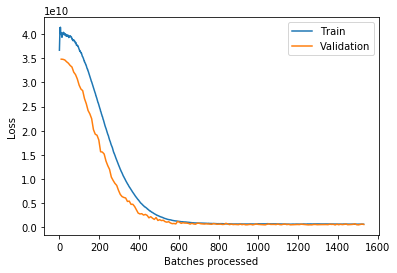

In [21]:
learner.recorder.plot_losses()

In [22]:
predicted, _ = learner.get_preds(ds_type=DatasetType.Test)
len(predicted)

1459

In [23]:
test_csv_df_idx = test_csv_df.index.tolist()
predicted_list = list(zip(test_csv_df_idx, sum(predicted.tolist(), [])))
submission_df = pd.DataFrame(data=predicted_list, columns=['Id','SalePrice'])
print(submission_df.shape)
print(submission_df.head())

(1459, 2)
     Id      SalePrice
0  1461  127636.171875
1  1462  125982.710938
2  1463  177935.015625
3  1464  185502.718750
4  1465  197007.453125


In [24]:
submission_file = 'submission-v7-nn.csv'
submission_file_comment = 'Submittion-nn-v7'
submission_df.to_csv(submission_file, index=False)

In [25]:
from IPython.display import FileLink, FileLinks

FileLink(submission_file)

/home/ubuntu/kaggles/houses/submittion-v7-nn.csv

In [26]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f {submission_file} -m {submission_file_comment}

100%|██████████████████████████████████████| 25.9k/25.9k [00:01<00:00, 14.4kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques